In [34]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from sklearn import metrics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import datasets

# **Test with IRIS Dataset**

In [35]:
# #Iris Dataset
# iris = datasets.load_iris()
# X = iris.data
# #KMeans
# km = KMeans(n_clusters=3)
# km.fit(X)
# km.predict(X)
# labels = km.labels_
# #Plotting
# fig = plt.figure(1, figsize=(7,7))
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2],
#           c=labels.astype(np.float), edgecolor="k", s=50)
# ax.set_xlabel("Petal width")
# ax.set_ylabel("Sepal length")
# ax.set_zlabel("Petal length")
# plt.title("K Means", fontsize=14)

# **Test with Our Motif Dataset** (Kink-turn, Sarcin-ricin, and Tandem-Shear)

In [36]:
#Our Dataset
X1 = pd.read_csv('features_dataset - known3_only.csv')

# family_map = {'Kink-turn':0, 'Reverse-kink-turn':1, 'Sarcin-ricin':2, 'Tandem-shear':3}
# X1['Family'] = X1['Family'].map(family_map).astype('int32')

X1 = X1.drop('motif_str', axis = 1)
family_labels = X1['family'].tolist()
X1 = X1.drop('motif_family', axis = 1)
X1 = X1.drop('family', axis = 1)
# Handling the missing values
# X1.fillna(method ='ffill', inplace = True)
  
print(X1.head())

   motif_len  gc_percentage  ...  total_bp  total_stk
0         13       0.384615  ...         2          7
1         13       0.384615  ...         2          6
2         10       0.700000  ...         2          4
3         10       0.400000  ...         1          1
4         10       0.600000  ...         1          3

[5 rows x 32 columns]


## K-means Clustering (Without any preprocessing)

[2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 1 2 1 1
 1 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 2 1 1 1 1 2 1 

Text(0.5, 0.92, 'K Means')

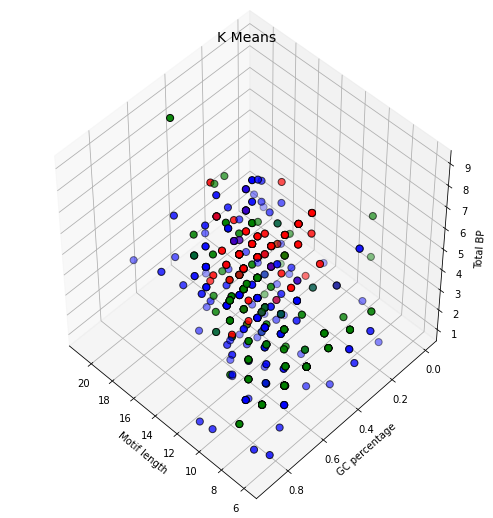

In [37]:
#KMeans
km = KMeans(n_clusters=3)
km.fit(X1)
km.predict(X1)
kmeans_labels = km.labels_
print(kmeans_labels)
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
cvec = [colours[label] for label in kmeans_labels]
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], X1.iloc[:, 30],
          # c=kmeans_labels.astype(np.float), edgecolor="k", s=50)
          c=cvec, edgecolor="k", s=50)
ax.set_xlabel("Motif length")
ax.set_ylabel("GC percentage")
ax.set_zlabel("Total BP")
plt.title("K Means", fontsize=14)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

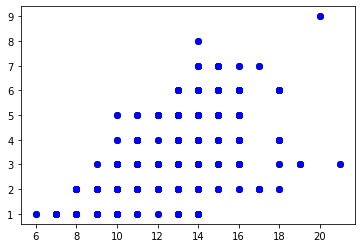

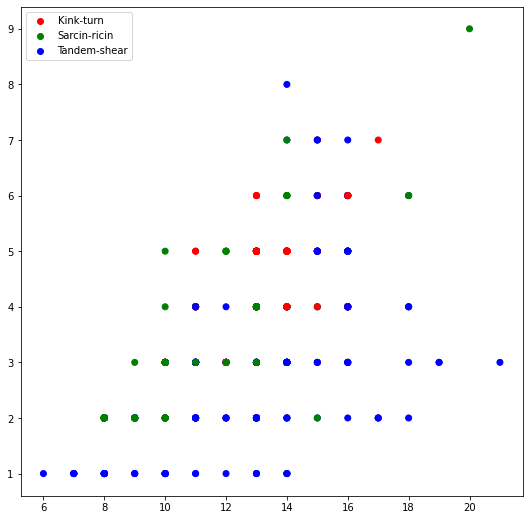

In [38]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
# colours[3] = 'y'


print(family_labels)
# Building the colour vector for each data point
cvec = [colours[label] for label in kmeans_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1['motif_len'], X1['total_bp'], color ='r');
g = plt.scatter(X1['motif_len'], X1['total_bp'], color ='g');
b = plt.scatter(X1['motif_len'], X1['total_bp'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1['motif_len'], X1['total_bp'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

## Data Pre-processing (Scaling, Normalize, PCA)

In [39]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
print(X1_scaled)

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X1_normalized = normalize(X1_scaled)
  
# Converting the numpy array into a pandas DataFrame
X1_normalized = pd.DataFrame(X1_normalized)
print(X1_normalized.head())

pca = PCA(n_components = 2)
X1_principal = pca.fit_transform(X1_normalized)
X1_principal = pd.DataFrame(X1_principal)
X1_principal.columns = ['P1', 'P2']
print(X1_principal.head())

[[ 0.34963285 -0.60192684  0.00958993 ... -1.20054861 -0.97390774
  -0.93586224]
 [ 0.34963285 -0.60192684  0.00958993 ... -1.20054861 -0.97390774
  -1.25648171]
 [-0.80783591  1.51242672  0.94018508 ... -0.00758641 -0.97390774
  -1.89772065]
 ...
 [-1.57948176  2.6856351   0.4624464  ... -0.00758641 -0.97390774
  -1.25648171]
 [-1.57948176  1.00962313  2.53264737 ...  1.1853758  -0.97390774
  -0.93586224]
 [-1.57948176  1.00962313  2.53264737 ... -0.00758641 -0.97390774
  -1.25648171]]
         0         1         2   ...        29        30        31
0  0.046431 -0.079935  0.001274  ... -0.159431 -0.129333 -0.124281
1  0.048483 -0.083468  0.001330  ... -0.166478 -0.135050 -0.174235
2 -0.142945  0.267621  0.166364  ... -0.001342 -0.172331 -0.335798
3 -0.119585 -0.073836  0.139177  ... -0.354314 -0.248762 -0.423307
4 -0.144770  0.150897  0.168488  ... -0.001360 -0.301153 -0.397543

[5 rows x 32 columns]
         P1        P2
0 -0.587219 -0.474017
1 -0.592451 -0.492594
2 -0.699572 -0.17

## K-means Clustering (After preprocessing)

[2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 0 2 2 2 1 1 2 2 1 1 1 2 1 1
 1 1 1 2 1 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 1 0 1 1
 2 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 2 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 0 0 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 1 1 0 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 2 2 1 0 1 1 2 2 1 2 2 2 2 0 2
 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 2 2 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 1 2 0 0 0 0 2 0 

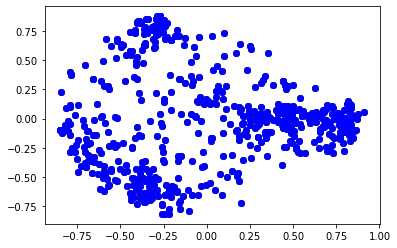

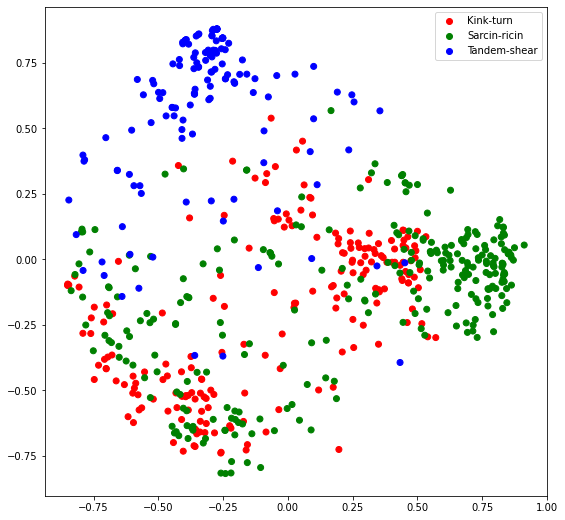

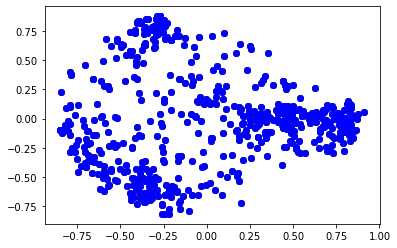

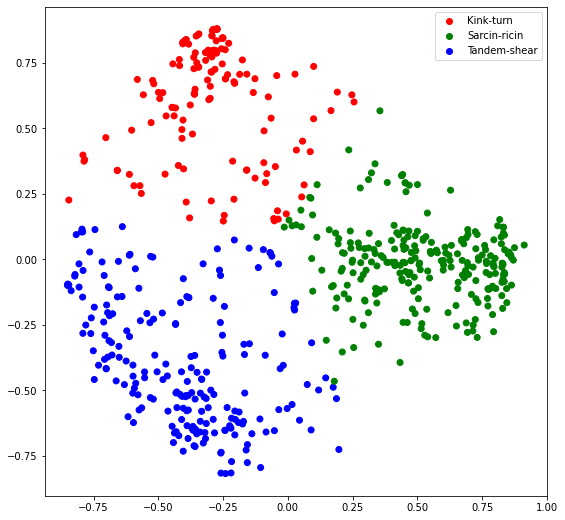

In [40]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X1_principal)
print(kmeans_labels)

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
# colours[3] = 'y'


print(family_labels)
# print(labels)
# Building the colour vector for each data point
cvec = [colours[label] for label in family_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

# Building the colour vector for each data point
cvec = [colours[label] for label in kmeans_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

## T-SNE (Without Preprocessing)

[[ 30.376858   -17.96461   ]
 [ 30.341162   -18.505177  ]
 [ 28.320623   -12.255646  ]
 ...
 [ -0.44198465  13.946933  ]
 [-26.597727    15.030067  ]
 [-20.973944     8.776059  ]]


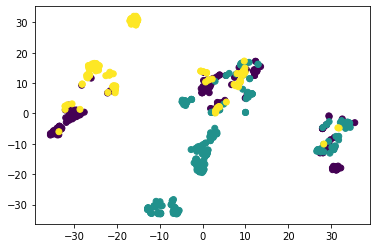

In [41]:
tsne = TSNE(learning_rate=100)

# Fitting Model
tsne_labels = tsne.fit_transform(X1)
print(tsne_labels)

x_axis = tsne_labels[:, 0]
y_axis = tsne_labels[:, 1]

plt.scatter(x_axis, y_axis, c=family_labels)
plt.show()
# print(family_labels)


## T-SNE (After Preprocessing)

[[ 10.031375   20.43838  ]
 [ 10.351342   20.778488 ]
 [  1.1218934  20.92537  ]
 ...
 [-16.03696    13.4349375]
 [-20.622849    6.778505 ]
 [-15.094434   12.7304735]]


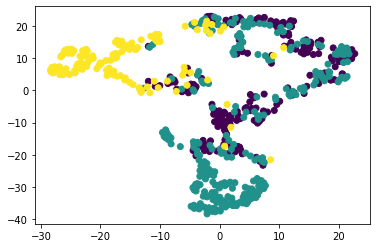

In [42]:
tsne = TSNE(learning_rate=100)

# Fitting Model
tsne_labels = tsne.fit_transform(X1_principal)
print(tsne_labels)

x_axis = tsne_labels[:, 0]
y_axis = tsne_labels[:, 1]

plt.scatter(x_axis, y_axis, c=family_labels)
plt.show()
# print(family_labels)


## **DBSCAN**

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

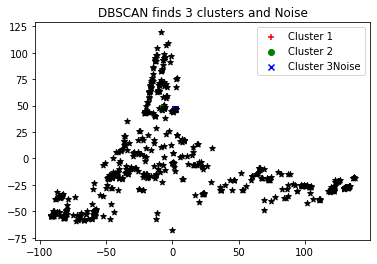

In [43]:
# Declaring Model
dbscan = DBSCAN(eps = 0.01, min_samples = 7)

# Fitting
dbscan_labels = dbscan.fit_predict(X1_principal)
print(dbscan_labels)
print(set(dbscan_labels))

# Transoring Using PCA
pca = PCA(n_components=2).fit(X1)
pca_2d = pca.transform(X1)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='x')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='k', marker='*')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3' 'Noise'])
plt.title('DBSCAN finds 3 clusters and Noise')
plt.show()


[1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 2 2 1 0 2 1 2 0 1 2 2 1 2 2 0 1 1 1 2 2 1 1 2 2 2 1 0 2
 2 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 2 0 2 2
 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 0 0 0 2 0 2 2 2 2 2 2 2 1
 1 0 0 0 2 2 0 0 2 0 2 0 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1
 1 2 2 0 0 2 2 2 2 2 2 0 1 1 2 2 2 2 2 0 1 1 0 1 2 0 0 2 1 1 2 0 0 1 2 0 0
 1 0 2 2 2 2 0 2 2 2 2 1 2 2 0 2 2 0 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 0 0 0 2 2 2 2 0 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 1 2 0 2 0 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 0 0 0 1 0 

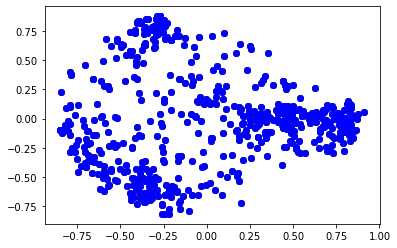

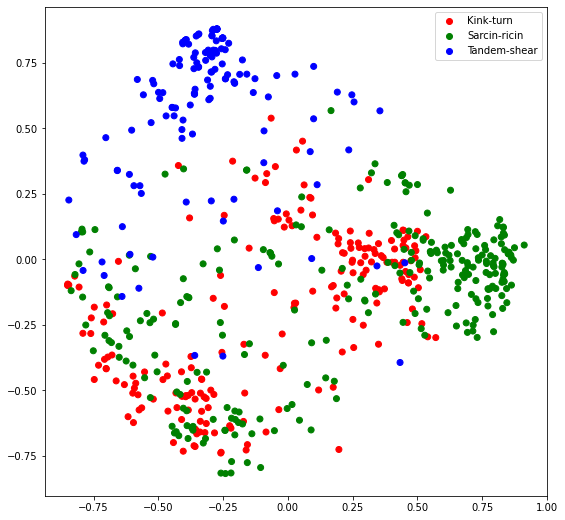

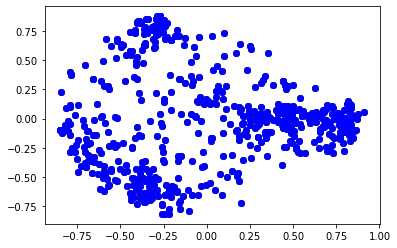

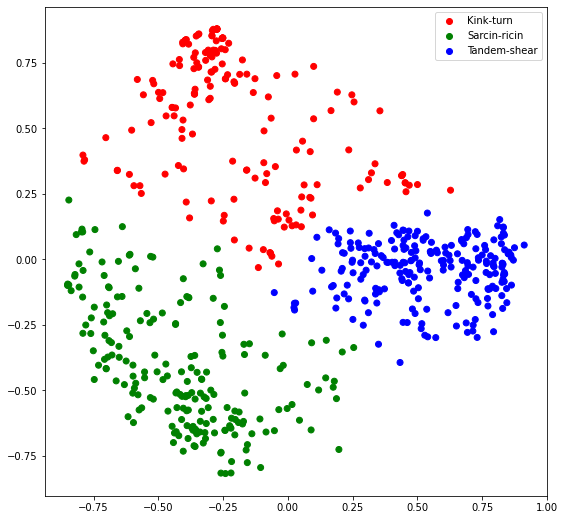

In [44]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X1_principal)
print(agglo_labels)

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
# colours[3] = 'y'


print(family_labels)
# print(labels)
# Building the colour vector for each data point
cvec = [colours[label] for label in family_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

# Building the colour vector for each data point
cvec = [colours[label] for label in agglo_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

[1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 0 1 1 1 2 2 1 1 2 2 2 1 2 2
 2 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 0 0 2 0 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1
 1 2 2 2 0 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 1 2 1 2 0 2 2 1 1 2 2 2 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 0 0 2 1 0 0 0 0 1 0 

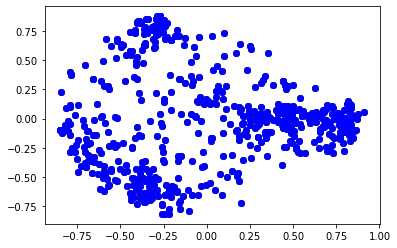

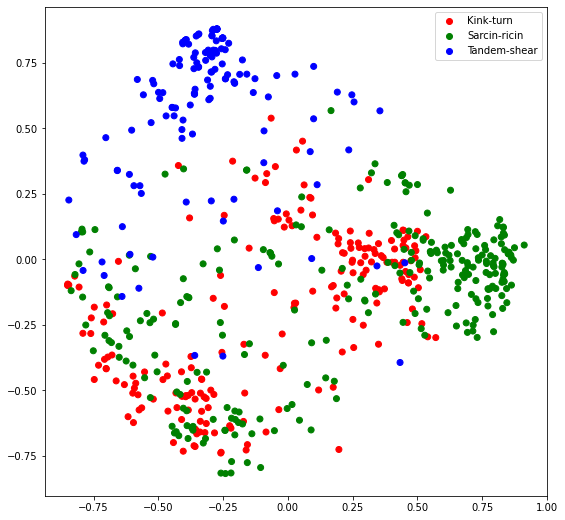

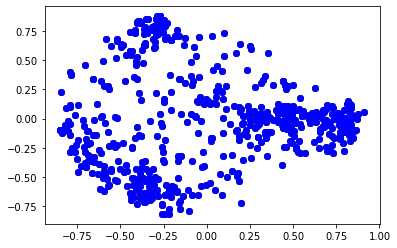

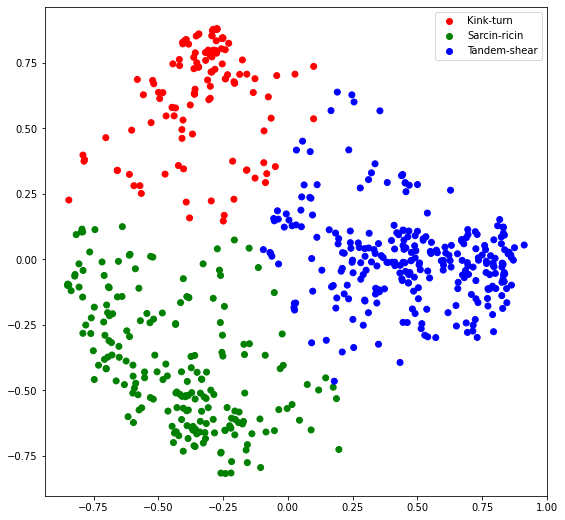

In [45]:
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X1_principal)
print(birch_labels)

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
# colours[3] = 'y'


print(family_labels)
# print(labels)

# Building the colour vector for each data point
cvec = [colours[label] for label in family_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

# Building the colour vector for each data point
cvec = [colours[label] for label in birch_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

# score = metrics.silhouette_score(X1_principal, birch_labels, metric = 'euclidean', sample_size = len(X1_principal))
# print("Silhouette score =", score)

[1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 0 1 1 1 2 2 1 1 2 2 2 1 2 2
 2 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 2 0 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1
 1 2 2 2 0 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 1 2 1 2 0 2 2 1 1 2 2 2 1 2 0 2
 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 0 0 0 1 0 0 0 0 1 2 

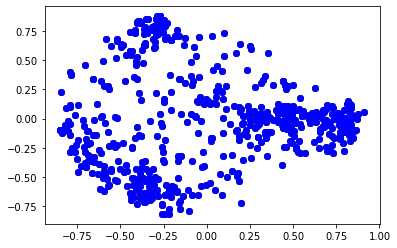

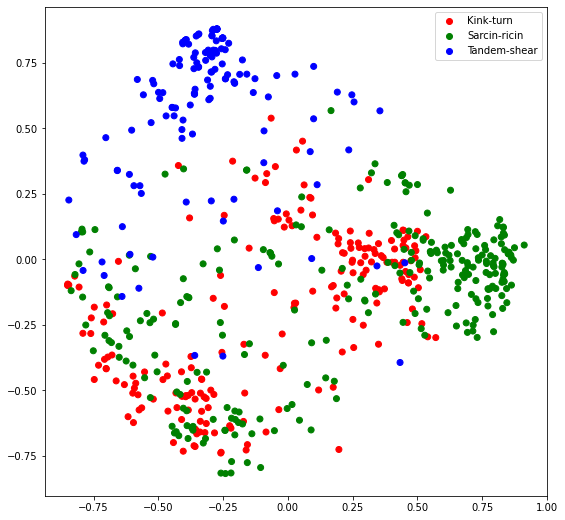

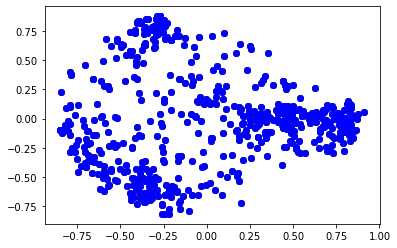

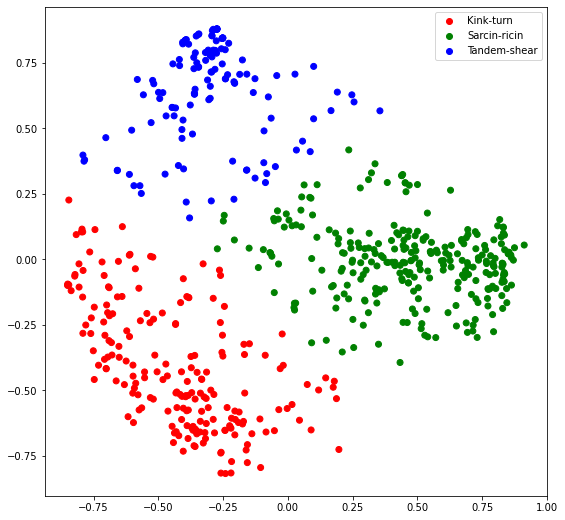

In [49]:
gm = GaussianMixture(n_components=3)
gm_labels = gm.fit_predict(X1_principal)
print(gm_labels)

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
# colours[3] = 'y'


print(family_labels)
# print(labels)

# Building the colour vector for each data point
cvec = [colours[label] for label in family_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

# Building the colour vector for each data point
colours = {}
colours[0] = 'b'
colours[1] = 'r'
colours[2] = 'g'
cvec = [colours[label] for label in gm_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='r');
g = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='g');
b = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
# y = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec)
  
# Building the legend

plt.legend((r, g, b), ('Kink-turn', 'Sarcin-ricin', 'Tandem-shear'))  
plt.show()

# score = metrics.silhouette_score(X1_principal, birch_labels, metric = 'euclidean', sample_size = len(X1_principal))
# print("Silhouette score =", score)

In [47]:
rand_score = metrics.rand_score(family_labels, kmeans_labels)
nmi_score = metrics.normalized_mutual_info_score(family_labels, kmeans_labels)
fow_mal_score = metrics.fowlkes_mallows_score(family_labels, kmeans_labels)
print('K-means')
print('rand_score: ' + str(rand_score))
print('nmi_score: ' + str(nmi_score))
print('fow_mal_score: ' + str(fow_mal_score))


rand_score = metrics.rand_score(family_labels, agglo_labels)
nmi_score = metrics.normalized_mutual_info_score(family_labels, agglo_labels)
fow_mal_score = metrics.fowlkes_mallows_score(family_labels, agglo_labels)
print('Agglo')
print('rand_score: ' + str(rand_score))
print('nmi_score: ' + str(nmi_score))
print('fow_mal_score: ' + str(fow_mal_score))

rand_score = metrics.rand_score(family_labels, birch_labels)
nmi_score = metrics.normalized_mutual_info_score(family_labels, birch_labels)
fow_mal_score = metrics.fowlkes_mallows_score(family_labels, birch_labels)
print('BIRCH')
print('rand_score: ' + str(rand_score))
print('nmi_score: ' + str(nmi_score))
print('fow_mal_score: ' + str(fow_mal_score))

rand_score = metrics.rand_score(family_labels, gm_labels)
nmi_score = metrics.normalized_mutual_info_score(family_labels, gm_labels)
fow_mal_score = metrics.fowlkes_mallows_score(family_labels, gm_labels)
print('GM')
print('rand_score: ' + str(rand_score))
print('nmi_score: ' + str(nmi_score))
print('fow_mal_score: ' + str(fow_mal_score))

rand_score = metrics.rand_score(family_labels, dbscan_labels)
nmi_score = metrics.normalized_mutual_info_score(family_labels, dbscan_labels)
fow_mal_score = metrics.fowlkes_mallows_score(family_labels, dbscan_labels)
print('DBSCAN')
print('rand_score: ' + str(rand_score))
print('nmi_score: ' + str(nmi_score))
print('fow_mal_score: ' + str(fow_mal_score))



K-means
rand_score: 0.6655342116188875
nmi_score: 0.31062204425412354
fow_mal_score: 0.5234085978546907
Agglo
rand_score: 0.6480917035431835
nmi_score: 0.2510928645557908
fow_mal_score: 0.48986046226265606
BIRCH
rand_score: 0.6612609237187731
nmi_score: 0.3133701605028244
fow_mal_score: 0.5251510351951102
GM
rand_score: 0.6653468755379583
nmi_score: 0.3196573825225094
fow_mal_score: 0.5291741778318623
DBSCAN
rand_score: 0.3969449029396575
nmi_score: 0.09186830815514381
fow_mal_score: 0.5909088180172464
